In [1]:
%matplotlib inline
import string
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14)

In [2]:
## Read in the data set.
with open("sentiment_labelled_sentences/full_set.txt") as f:
    content = f.readlines()
    
## Remove leading and trailing white space
content = [x.strip() for x in content]

## Separate the sentences from the labels
sentences = [x.split("\t")[0] for x in content]
labels = [x.split("\t")[1] for x in content]

## Transform the labels from '0 v.s. 1' to '-1 v.s. 1'
y = np.array(labels, dtype='int8')
y = 2*y - 1

In [3]:
## full_remove takes a string x and a list of characters removal_list 
## returns x with all the characters in removal_list replaced by ' '
def full_remove(x, removal_list):
    for w in removal_list:
        x = x.replace(w, ' ')
    return x

## Remove digits
digits = [str(x) for x in range(10)]
digit_less = [full_remove(x, digits) for x in sentences]

## Remove punctuation
punc_less = [full_remove(x, list(string.punctuation)) for x in digit_less]

## Make everything lower-case
sents_lower = [x.lower() for x in punc_less]

In [5]:
print (sents_lower)

['so there is no way for me to plug it in here in the us unless i go by a converter ', 'good case  excellent value ', 'great for the jawbone ', 'tied to charger for conversations lasting more than    minutes major problems  ', 'the mic is great ', 'i have to jiggle the plug to get it to line up right to get decent volume ', 'if you have several dozen or several hundred contacts  then imagine the fun of sending each of them one by one ', 'if you are razr owner   you must have this ', 'needless to say  i wasted my money ', 'what a waste of money and time  ', 'and the sound quality is great ', 'he was very impressed when going from the original battery to the extended battery ', 'if the two were seperated by a mere    ft i started to notice excessive static and garbled sound from the headset ', 'very good quality though', 'the design is very odd  as the ear  clip  is not very comfortable at all ', 'highly recommend for any one who has a blue tooth phone ', 'i advise everyone do not be foo

In [6]:
print(punc_less)

['So there is no way for me to plug it in here in the US unless I go by a converter ', 'Good case  Excellent value ', 'Great for the jawbone ', 'Tied to charger for conversations lasting more than    minutes MAJOR PROBLEMS  ', 'The mic is great ', 'I have to jiggle the plug to get it to line up right to get decent volume ', 'If you have several dozen or several hundred contacts  then imagine the fun of sending each of them one by one ', 'If you are Razr owner   you must have this ', 'Needless to say  I wasted my money ', 'What a waste of money and time  ', 'And the sound quality is great ', 'He was very impressed when going from the original battery to the extended battery ', 'If the two were seperated by a mere    ft I started to notice excessive static and garbled sound from the headset ', 'Very good quality though', 'The design is very odd  as the ear  clip  is not very comfortable at all ', 'Highly recommend for any one who has a blue tooth phone ', 'I advise EVERYONE DO NOT BE FOO

In [7]:
## Define our stop words
stop_set = set(['the', 'a', 'an', 'i', 'he', 'she', 'they', 'to', 'of', 'it', 'from'])

## Remove stop words
sents_split = [x.split() for x in sents_lower]
sents_processed = [" ".join(list(filter(lambda a: a not in stop_set, x))) for x in sents_split]

In [8]:
print(sents_split)

[['so', 'there', 'is', 'no', 'way', 'for', 'me', 'to', 'plug', 'it', 'in', 'here', 'in', 'the', 'us', 'unless', 'i', 'go', 'by', 'a', 'converter'], ['good', 'case', 'excellent', 'value'], ['great', 'for', 'the', 'jawbone'], ['tied', 'to', 'charger', 'for', 'conversations', 'lasting', 'more', 'than', 'minutes', 'major', 'problems'], ['the', 'mic', 'is', 'great'], ['i', 'have', 'to', 'jiggle', 'the', 'plug', 'to', 'get', 'it', 'to', 'line', 'up', 'right', 'to', 'get', 'decent', 'volume'], ['if', 'you', 'have', 'several', 'dozen', 'or', 'several', 'hundred', 'contacts', 'then', 'imagine', 'the', 'fun', 'of', 'sending', 'each', 'of', 'them', 'one', 'by', 'one'], ['if', 'you', 'are', 'razr', 'owner', 'you', 'must', 'have', 'this'], ['needless', 'to', 'say', 'i', 'wasted', 'my', 'money'], ['what', 'a', 'waste', 'of', 'money', 'and', 'time'], ['and', 'the', 'sound', 'quality', 'is', 'great'], ['he', 'was', 'very', 'impressed', 'when', 'going', 'from', 'the', 'original', 'battery', 'to', 'the'

In [9]:
sents_processed[0:10]

['so there is no way for me plug in here in us unless go by converter',
 'good case excellent value',
 'great for jawbone',
 'tied charger for conversations lasting more than minutes major problems',
 'mic is great',
 'have jiggle plug get line up right get decent volume',
 'if you have several dozen or several hundred contacts then imagine fun sending each them one by one',
 'if you are razr owner you must have this',
 'needless say wasted my money',
 'what waste money and time']

In [11]:
sents_processed[0:200]

['so there is no way for me plug in here in us unless go by converter',
 'good case excellent value',
 'great for jawbone',
 'tied charger for conversations lasting more than minutes major problems',
 'mic is great',
 'have jiggle plug get line up right get decent volume',
 'if you have several dozen or several hundred contacts then imagine fun sending each them one by one',
 'if you are razr owner you must have this',
 'needless say wasted my money',
 'what waste money and time',
 'and sound quality is great',
 'was very impressed when going original battery extended battery',
 'if two were seperated by mere ft started notice excessive static and garbled sound headset',
 'very good quality though',
 'design is very odd as ear clip is not very comfortable at all',
 'highly recommend for any one who has blue tooth phone',
 'advise everyone do not be fooled',
 'so far so good',
 'works great',
 'clicks into place in way that makes you wonder how long that mechanism would last',
 'went on

In [12]:
In order to use linear classifiers on our data set, we need to transform our textual data into numeric data. The classical way to do this is known as the bag of words representation.

In this representation, each word is thought of as corresponding to a number in {1, 2, ..., V} where V is the size of our vocabulary. And each sentence is represented as a V-dimensional vector  𝑥 , where  𝑥𝑖  is the number of times that word  𝑖  occurs in the sentence.

To do this transformation, we will make use of the CountVectorizer class in scikit-learn. We will cap the number of features at 4500, meaning a word will make it into our vocabulary only if it is one of the 4500 most common words in the corpus. This is often a useful step as it can weed out spelling mistakes and words which occur too infrequently to be useful.

Finally, we will also append a '1' to the end of each vector to allow our linear classifier to learn a bias term.

SyntaxError: invalid syntax (<ipython-input-12-8b5788f438fd>, line 1)

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

## Transform to bag of words representation.
vectorizer = CountVectorizer(analyzer = "word", tokenizer = None, preprocessor = None, stop_words = None, max_features = 4500)
data_features = vectorizer.fit_transform(sents_processed)

## Append '1' to the end of each vector.
data_mat = data_features.toarray()

#p_mat = data_features.toarray()
#data_mat = np.ones((p_mat.shape[0], p_mat.shape[1]+1))
#data_mat[:,:-1] = p_mat

In [14]:
## Split the data into testing and training sets
np.random.seed(0)
test_inds = np.append(np.random.choice((np.where(y==-1))[0], 250, replace=False), np.random.choice((np.where(y==1))[0], 250, replace=False))
train_inds = list(set(range(len(labels))) - set(test_inds))

train_data = data_mat[train_inds,]
train_labels = y[train_inds]

test_data = data_mat[test_inds,]
test_labels = y[test_inds]

print("train data: ", train_data.shape)
print("test data: ", test_data.shape)

train data:  (2500, 4500)
test data:  (500, 4500)


In [16]:
#2. Fitting a logistic regression model to the training data
#We could implement our own logistic regression solver using stochastic gradient descent, but fortunately, there is already one built into scikit-learn.

#Due to the randomness in the SGD procedure, different runs can yield slightly different solutions (and thus different error values).
from sklearn.linear_model import SGDClassifier

## Fit logistic classifier on training data
clf = SGDClassifier(loss="log", penalty="none")
clf.fit(train_data, train_labels)

## Pull out the parameters (w,b) of the logistic regression model
w = clf.coef_[0,:]
b = clf.intercept_

## Get predictions on training and test data
preds_train = clf.predict(train_data)
preds_test = clf.predict(test_data)

## Compute errors
errs_train = np.sum((preds_train > 0.0) != (train_labels > 0.0))
errs_test = np.sum((preds_test > 0.0) != (test_labels > 0.0))

print ("Training error: "), float(errs_train)/len(train_labels)
print ("Test error: "), float(errs_test)/len(test_labels)

C:\Users\josep\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


Training error: 
Test error: 


(None, 0.186)

In [17]:
#3. Analyzing the margin
## Return number of test points for which Pr(y=1) lies in [0, 0.5 - gamma) or (0.5 + gamma, 1]
def margin_counts(clf, test_data, gamma):
    ## Compute probability on each test point
    preds = clf.predict_proba(test_data)[:,1]
    ## Find data points for which prediction is at least gamma away from 0.5
    margin_inds = np.where((preds > (0.5+gamma)) | (preds < (0.5-gamma)))[0]
    
    return float(len(margin_inds))

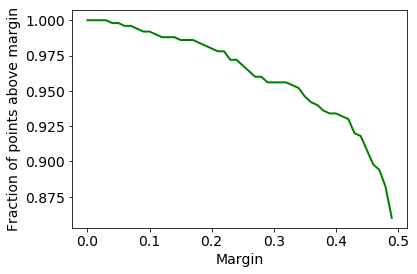

In [18]:
#We now visualize the test set's distribution of margin values.
gammas = np.arange(0,0.5,0.01)
f = np.vectorize(lambda g: margin_counts(clf, test_data, g))
plt.plot(gammas, f(gammas)/500.0, linewidth=2, color='green')
plt.xlabel('Margin', fontsize=14)
plt.ylabel('Fraction of points above margin', fontsize=14)
plt.show()

In [19]:
## Return error of predictions that lie in intervals [0, 0.5 - gamma) and (0.5 + gamma, 1]
def margin_errors(clf, test_data, test_labels, gamma):
    ## Compute probability on each test point
    preds = clf.predict_proba(test_data)[:,1]
    
    ## Find data points for which prediction is at least gamma away from 0.5
    margin_inds = np.where((preds > (0.5+gamma)) | (preds < (0.5-gamma)))[0]
    
    ## Compute error on those data points.
    num_errors = np.sum((preds[margin_inds] > 0.5) != (test_labels[margin_inds] > 0.0))
    return float(num_errors)/len(margin_inds)

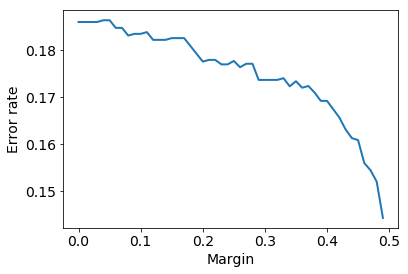

In [20]:
#We now visualize the relationship between margin and error rate.
## Create grid of gamma values
gammas = np.arange(0, 0.5, 0.01)

## Compute margin_errors on test data for each value of g
f = np.vectorize(lambda g: margin_errors(clf, test_data, test_labels, g))

## Plot the result
plt.plot(gammas, f(gammas), linewidth=2)
plt.ylabel('Error rate', fontsize=14)
plt.xlabel('Margin', fontsize=14)
plt.show()

In [21]:
## Convert vocabulary into a list:
vocab = np.array([z[0] for z in sorted(vectorizer.vocabulary_.items(), key=lambda x:x[1])])

## Get indices of sorting w
inds = np.argsort(w)

## Words with large negative values
neg_inds = inds[0:50]
print("Highly negative words: ")
print([str(x) for x in list(vocab[neg_inds])])

## Words with large positive values
pos_inds = inds[-49:-1]
print("Highly positive words: ")
print([str(x) for x in list(vocab[pos_inds])])

Highly negative words: 
['sucks', 'worst', 'bad', 'poor', 'avoid', 'aren', 'bland', 'wasn', 'pm', 'rude', 'started', 'unfortunately', 'directing', 'slow', 'mediocre', 'wasted', 'then', 'disappointment', 'minutes', 'ok', 'stereotypes', 'return', 'stupid', 'wife', 'fly', 'racial', 'literally', 'looks', 'waste', 'fails', 'another', 'ripped', 'low', 'picture', 'dishes', 'within', 'boring', 'make', 'torture', 'awful', 'guess', 'flat', 'green', 'sitting', 'not', 'disappointing', 'put', 'year', 'depth', 'received']
Highly positive words: 
['carry', 'happy', 'amount', 'sauce', 'art', 'tom', 'happier', 'brings', 'steak', 'best', 'wow', 'parts', 'enjoyed', 'cult', 'plays', 'beer', 'incredible', 'angel', 'definitely', 'ponyo', 'years', 'lovely', 'sex', 'family', 'hope', 'fun', 'occasionally', 'love', 'funny', 'decent', 'easy', 'cool', 'exactly', 'amazing', 'joy', 'scamp', 'works', 'awesome', 'delicious', 'great', 'loved', 'fantastic', 'liked', 'interesting', 'beautiful', 'comfortable', 'excellent

In [23]:
def preprocessor(text):
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    text = (re.sub('[\W]+', ' ', text.lower()) + ' ' + ' '.join(emoticons).replace('-', ''))
    text=text.split(' ')
    for each in text:
        chk=[True for s in stop_words if s==each]
        if chk==[True]:
            text.remove(each)
    text=' '.join(text[0:len(text)-2])
    return text

In [32]:

def predict(sent):
    test=np.zeros(3030)
    pos=[]
    for each in preprocessor(sent).split(' '):
        pos.append(count.vocabulary_.get(each,4000))
    for each in pos:
        if each<3031:
            test[each]=test[each]+1
    return cls.predict(test)

In [37]:

def check(k):
    value=app.getEntry('review')
    value=predict(value)
    if value==[1]:
        app.setImage("profpic","love.png")
    elif value==[0]:
        app.setImage("profpic","angry.png")
    else:
        pass

